In [ ]:
# 모듈 로딩 후 오디오 추출
import moviepy.editor as mp

clip = mp.VideoFileClip("sample1.mp4")
clip.audio.write_audiofile("sample.wav")

In [70]:
from moviepy.editor import *
videoclip = VideoFileClip("test.avi")
audioclip = AudioFileClip("sample1.wav")

videoclip.audio = audioclip
videoclip.write_videofile("0628_sample_a.mp4")

Moviepy - Building video 0628_sample_a.mp4.
MoviePy - Writing audio in 0628_sample_aTEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video 0628_sample_a.mp4



Moviepy - Done !
Moviepy - video ready 0628_sample_a.mp4


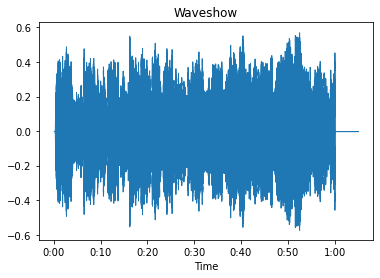

In [1]:
import librosa
import librosa.display
import matplotlib.pyplot as plt         # 그래프를 출력하기 위한 모듈

audio = 'sample1.wav'
y, sr = librosa.load(audio)             # 소리 파일 불러오기

librosa.display.waveshow(y, sr=sr)      # 소리 데이터를 그래프로 표현하기
plt.title('Waveshow')                   # 그래프 제목 설정하기   
plt.show()

In [66]:
print(f'진폭 최대값 : {max(y)},\n진폭 최소값 : {min(y)},\n진폭 전체 길이 : {len(y)},\n진폭 초당 길이 : {len(y) / 60}')

진폭 최대값 : 0.572239875793457,
진폭 최소값 : -0.5440673232078552,
진폭 전체 길이 : 1433780,
진폭 초당 길이 : 23896.333333333332


In [68]:
mean = []
tmp = int(len(y)/60)

scale_y = y * 10000

for i in range(60):
    mean.append(np.mean(scale_y[(i * tmp) :((i+1) * tmp)]))

mean


[-1.5485352,
 1.9695712,
 -1.9242734,
 0.05261026,
 0.10105325,
 0.39894053,
 -0.75326777,
 0.3523485,
 -0.3351938,
 -0.24785843,
 -0.5485575,
 0.22358687,
 -0.352793,
 -0.003138192,
 -1.080006,
 0.76407987,
 -0.46730435,
 -0.32254753,
 0.15250497,
 -0.09768633,
 -0.1694926,
 -1.0058725,
 -0.26180932,
 0.39581302,
 -0.7654004,
 -0.5274917,
 1.0334878,
 -1.2547456,
 0.55605906,
 -0.7271075,
 1.1001158,
 -1.1143537,
 0.07990094,
 -0.73893446,
 -0.8732694,
 0.9430489,
 0.5817277,
 -1.0127,
 1.3345625,
 -1.2164465,
 -0.41646162,
 -1.6383659,
 0.9459839,
 0.27996904,
 -0.7807192,
 -0.1155909,
 -0.59285074,
 0.5898442,
 -0.44768843,
 -0.36627877,
 0.45636237,
 -0.28037113,
 0.060809854,
 -0.2966122,
 -0.35025287,
 0.0349795,
 0.0,
 0.0,
 0.0,
 0.0]

In [65]:
sec1_mean

0.08389205

In [62]:
# 이미지 전체길이 3813
# FPS 30일 경우, 대략 2.1분

60000000.0

3-1. Tempo(BPM)

In [50]:
tempo , _ = librosa.beat.beat_track(y,sr=sr)     
print(tempo)

C:\Users\goyang\AppData\Local\Temp/ipykernel_16484/3424808235.py:1: FutureWarning: Pass y=[0. 0. 0. ... 0. 0. 0.] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  tempo , _ = librosa.beat.beat_track(y,sr=sr)


107.666015625


3-2. Zero Crossing Rate
* 음파가 양에서 음으로 또는 음에서 양으로 바뀌는 비율

* 간단하지만 많이 쓰인다.

[False False False ... False False False]
69860
56


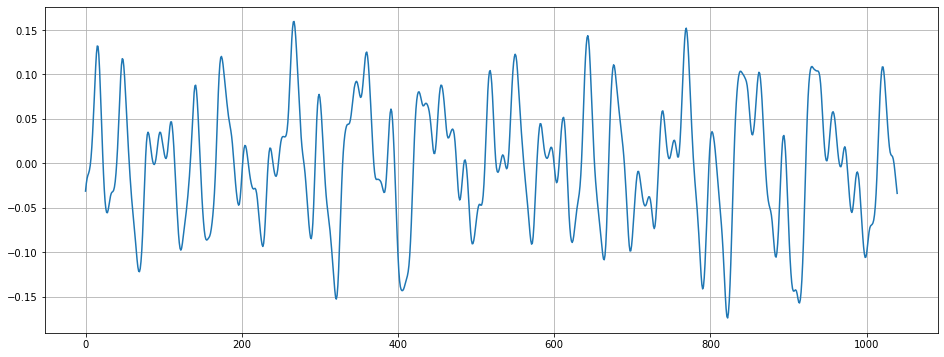

In [55]:
zero_crossings = librosa.zero_crossings(y, pad=False)

print(zero_crossings)
print(sum(zero_crossings)) # 음 <-> 양 이동한 횟수

n0 = 7000
n1 = 8040

zero_crossings = librosa.zero_crossings(y[n0:n1], pad=False) #n0 ~ n1 사이 zero crossings 
print(sum(zero_crossings))

plt.figure(figsize=(16,6))
plt.plot(y[n0:n1])
plt.grid()
plt.show()

3-3. Harmonic and Percussive Components
* Harmonics : 사람의 귀로 구분할 수 없는 특징들(음악의 색깔)

* Percussives: 리듬과 감정을 나타내는 충격파

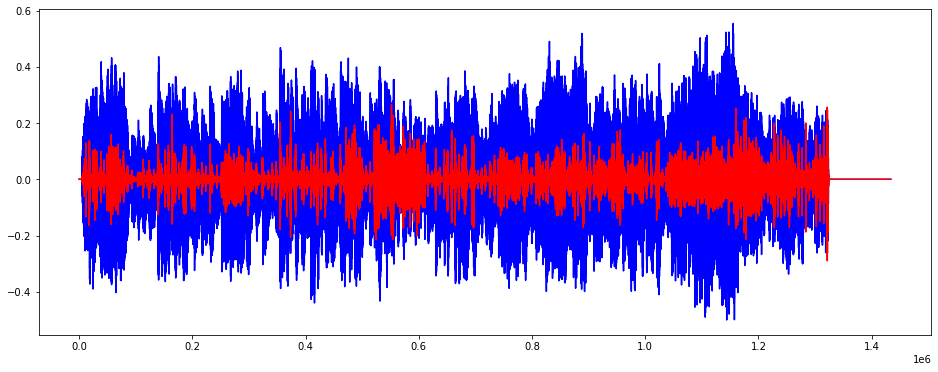

In [56]:
y_harm, y_perc = librosa.effects.hpss(y)

plt.figure(figsize=(16,6))
plt.plot(y_harm, color='b')
plt.plot(y_perc, color='r')
plt.show()

3-4.Spectral Centroid
* 소리를 주파수 표현했을 때, 주파수의 가중평균을 계산하여 소리의 "무게 중심"이 어딘지를 알려주는 지표

* 예를 들어, 블루스 음악은 무게 중심이 가운데 부분에 놓여있는 반면, 메탈 음악은 (끝 부분에서 달리기 때문에) 노래의 마지막 부분에 무게 중심이 실린다.

C:\Users\goyang\AppData\Local\Temp/ipykernel_16484/611124149.py:1: FutureWarning: Pass y=[0. 0. 0. ... 0. 0. 0.] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spectral_centroids = librosa.feature.spectral_centroid(y, sr=sr)[0]


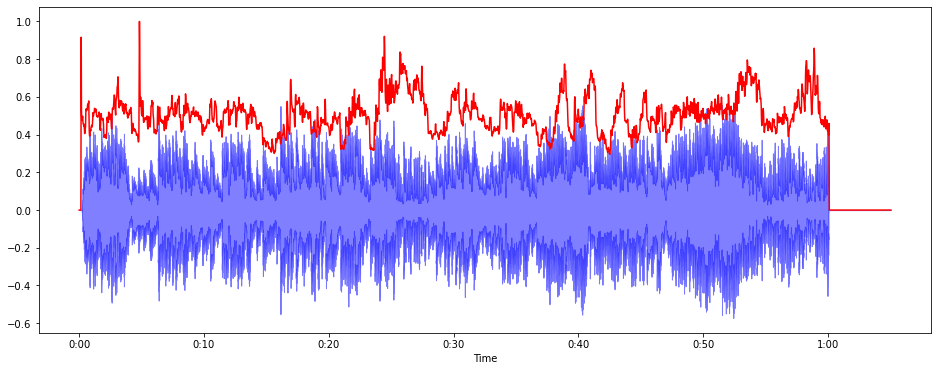

In [57]:
spectral_centroids = librosa.feature.spectral_centroid(y, sr=sr)[0]

#Computing the time variable for visualization
frames = range(len(spectral_centroids))

# Converts frame counts to time (seconds)
t = librosa.frames_to_time(frames)

import sklearn
def normalize(x, axis=0):
  return sklearn.preprocessing.minmax_scale(x, axis=axis)    #sk.minmax_scale() : 최대 최소를 0 ~ 1 로 맞춰준다.

plt.figure(figsize=(16,6))
librosa.display.waveshow(y, sr=sr, alpha=0.5, color='b')
plt.plot(t, normalize(spectral_centroids), color='r')
plt.show()

3-5. Spectral Rolloff
* 신호 모양을 측정한다.

* 총 스펙트럴 에너지 중 낮은 주파수(85% 이하)에 얼마나 많이 집중되어 있는가

C:\Users\goyang\AppData\Local\Temp/ipykernel_16484/4123416780.py:1: FutureWarning: Pass y=[0. 0. 0. ... 0. 0. 0.] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spectral_rolloff = librosa.feature.spectral_rolloff(y, sr=sr)[0]


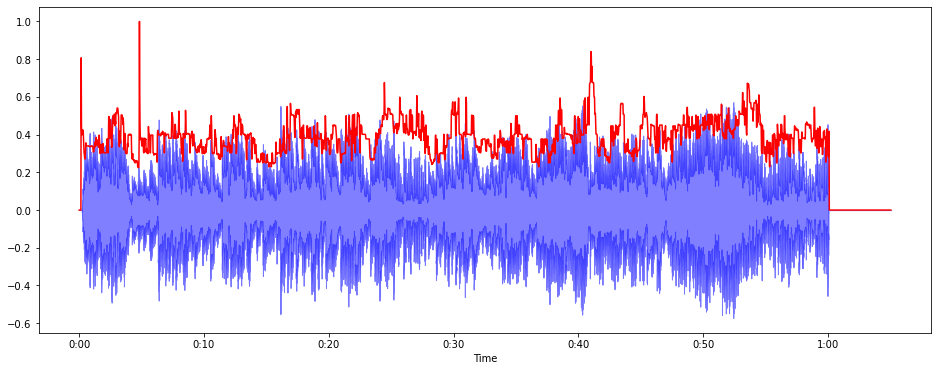

In [58]:
spectral_rolloff = librosa.feature.spectral_rolloff(y, sr=sr)[0]

plt.figure(figsize=(16,6))
librosa.display.waveshow(y,sr=sr,alpha=0.5,color='b')
plt.plot(t, normalize(spectral_rolloff),color='r')
plt.show()